![](logo.png)

![](pic.jpg)

# Day Objectives

## Random Forest
- It can be used for both Classification and Regression problems in ML.
- It is based on the concept of ensemble learning
- Which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
- Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset
- Takes the average to improve the predictive accuracy of that dataset.
- The random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
- **The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.**

### Why use Random Forest?
- It takes less training time as compared to other algorithms.
- It predicts output with high accuracy, even for the large dataset it runs efficiently.
- It can also maintain accuracy when a large proportion of data is missing.


![](tree.png)


### Advantages of Random Forest
- Random Forest is capable of performing both Classification and Regression tasks.
- It is capable of handling large datasets with high dimensionality.
- It enhances the accuracy of the model and prevents the overfitting issue.

[WineData.csv](https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/wine.data.csv)
[Salary.csv](https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/Salary_Data.csv)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_wine

In [5]:
wine = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/wine.data.csv")
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.shape

(178, 14)

In [7]:
wine["Class"].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [8]:
wine.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [9]:
X = wine[["Alcalinity of ash", "Flavanoids"]]
y = wine["Class"]

In [10]:
wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [22]:
X.shape

(178, 2)

In [24]:
y.shape

(178,)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest as classifier

In [50]:
rcls = RandomForestClassifier(n_estimators=3, max_depth = 4)

In [51]:
rcls.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=3)

In [52]:
pred_values  = rcls.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [55]:
accuracy_score(y_test,pred_values)*100

85.18518518518519

In [56]:
confusion_matrix(y_test,pred_values)

array([[15,  4,  0],
       [ 3, 18,  0],
       [ 0,  1, 13]], dtype=int64)

In [57]:
y_test.shape

(54,)

In [58]:
len(rcls.estimators_)

3

In [59]:
rcls.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=844603429),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=777696916),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1931483356)]

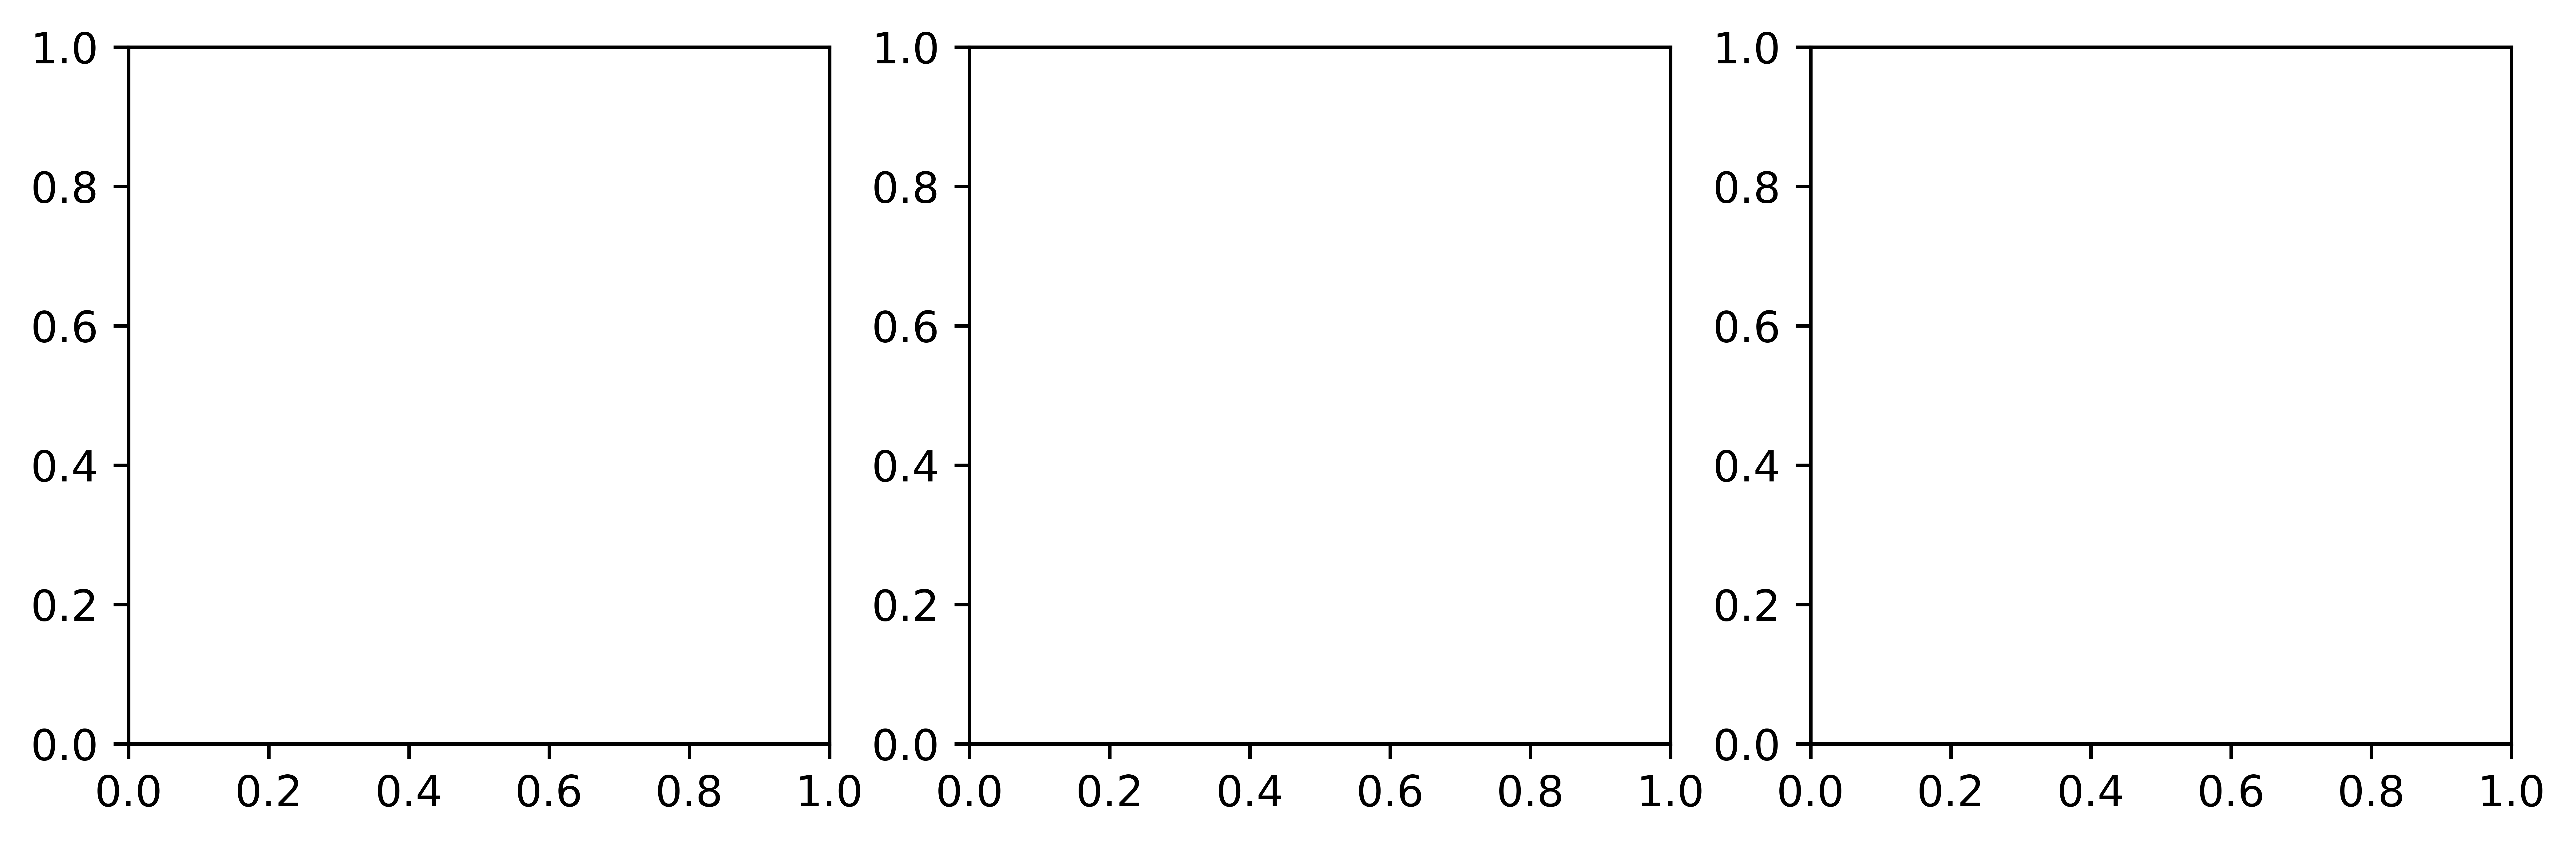

In [60]:
fig,axis = plt.subplots(nrows = 1, ncols = 3, figsize = (10,3), dpi = 1000 )

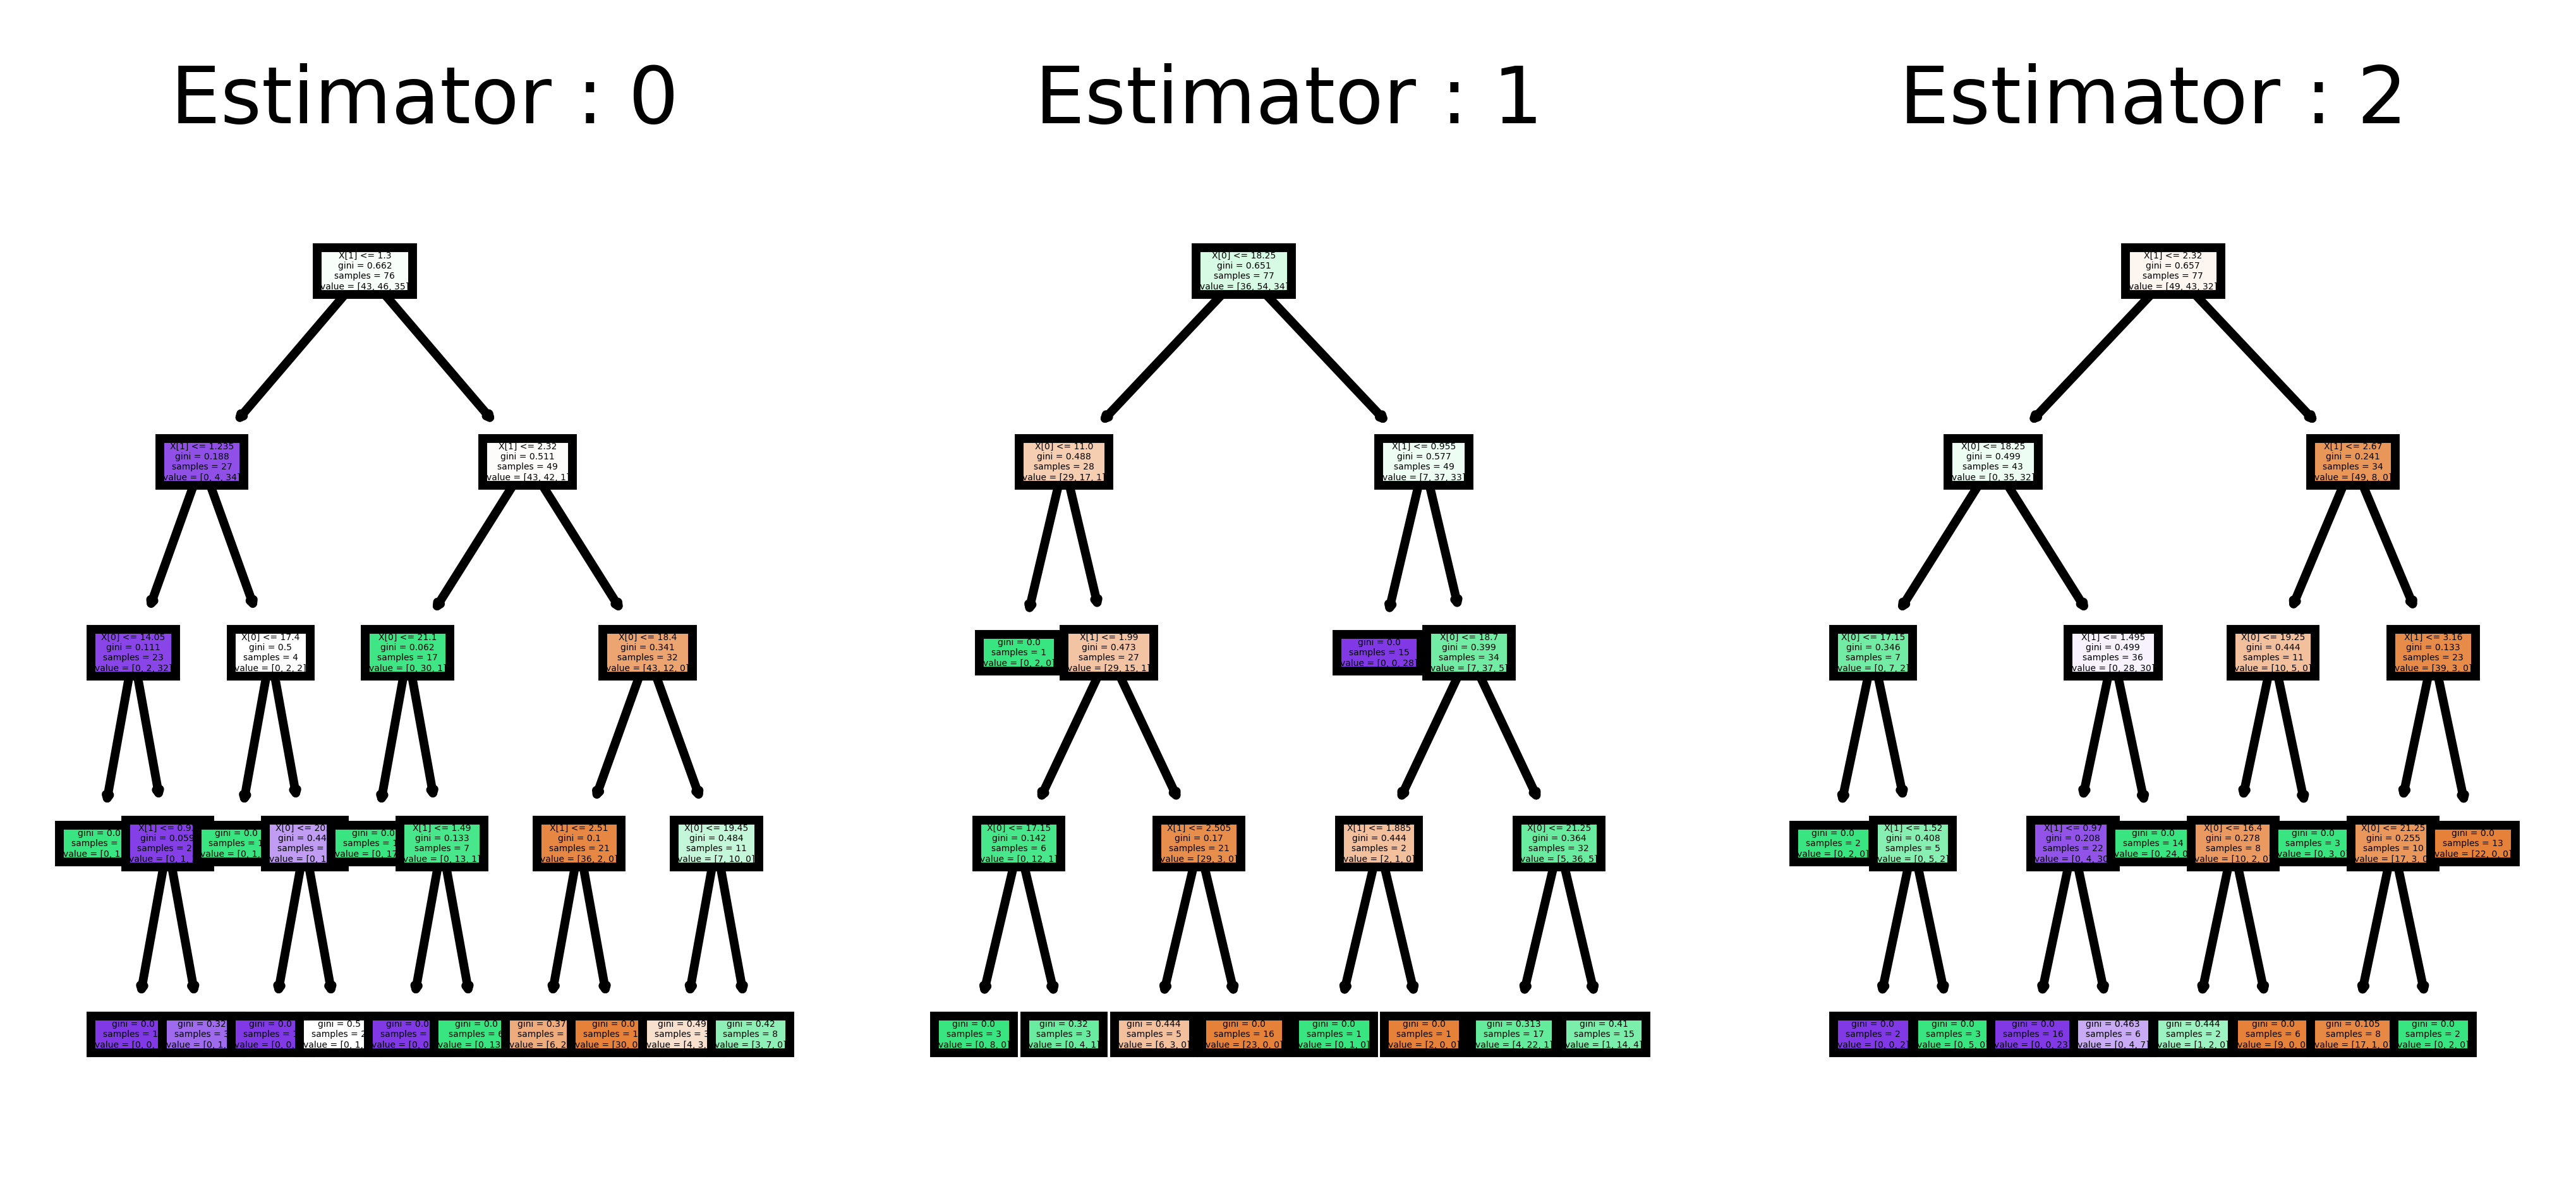

In [63]:
# plotting Random forest 
fig,axis = plt.subplots(nrows = 1, ncols = 3, figsize = (5,2), dpi = 1000 )
for index in range(3):
    tree.plot_tree(rcls.estimators_[index],
                  ax = axis[index],
                  filled = True)
    axis[index].set_title("Estimator : "+str(index), fontsize = 9)

178 sample of wine dataset - random forest
3 decision tree
1 decision tree - 76   - wine class 1
2 decision tree  - 77  - wine class 3
3 decion tree   - 77   - wine class 1

wine class 1 

In [64]:
X_train.shape

(124, 2)

In [45]:
axis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000270ED0AA940>,
      dtype=object)

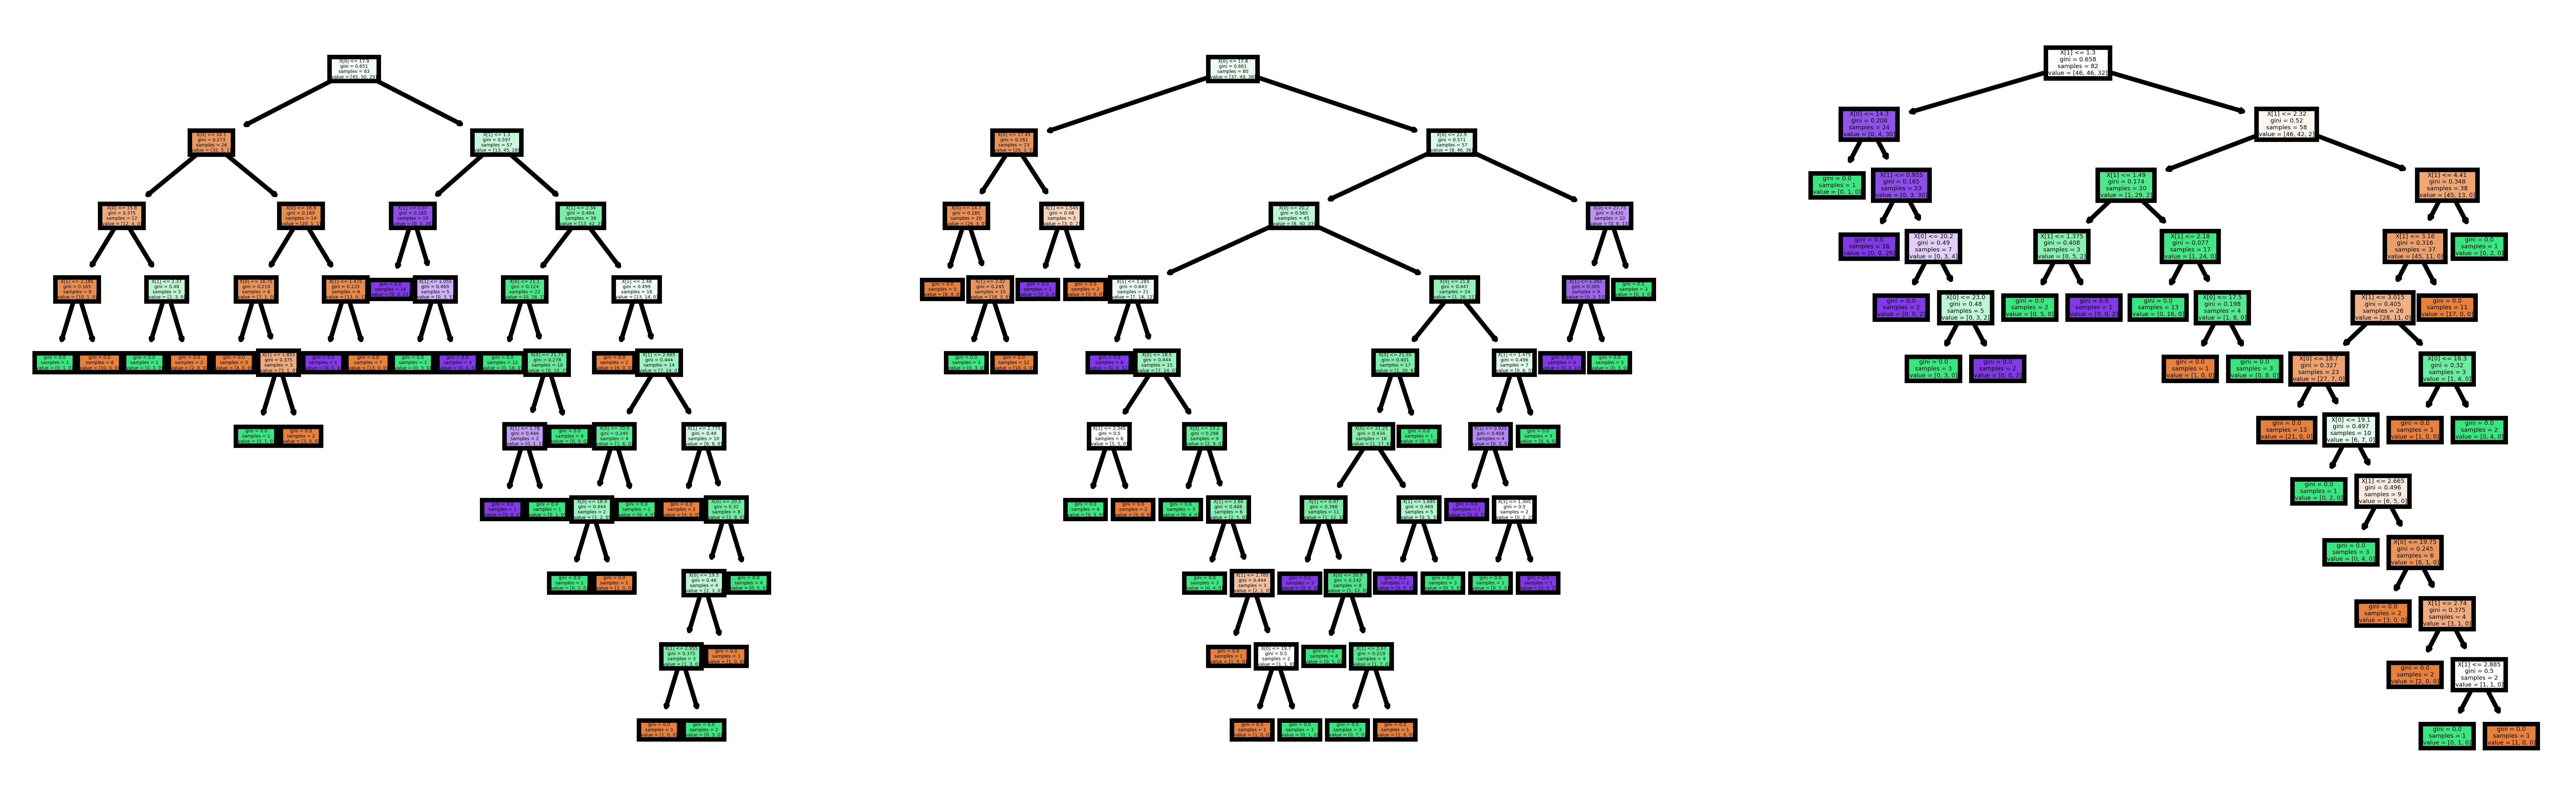

In [46]:
fig

# Random Forest as Regressor

In [66]:
salary = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## To predcit Salary of employee based on no. of years of experience

In [67]:
X = salary[["YearsExperience"]] # predictor variable
y = salary["Salary"] # predicted variable

In [68]:
salary.shape

(30, 2)

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rreg = RandomForestRegressor(n_estimators=200, max_depth=3)

In [85]:
rreg.fit(X,y)

RandomForestRegressor(max_depth=3, n_estimators=200)

In [86]:
rreg.predict([[10]])

array([118781.43006151])

In [87]:
pred_values = rreg.predict(X)

In [88]:
from sklearn.metrics import r2_score
r2_score(y,pred_values)*100

98.76668165891974

## Plotting random forest

In [89]:
len(rreg.estimators_)

200

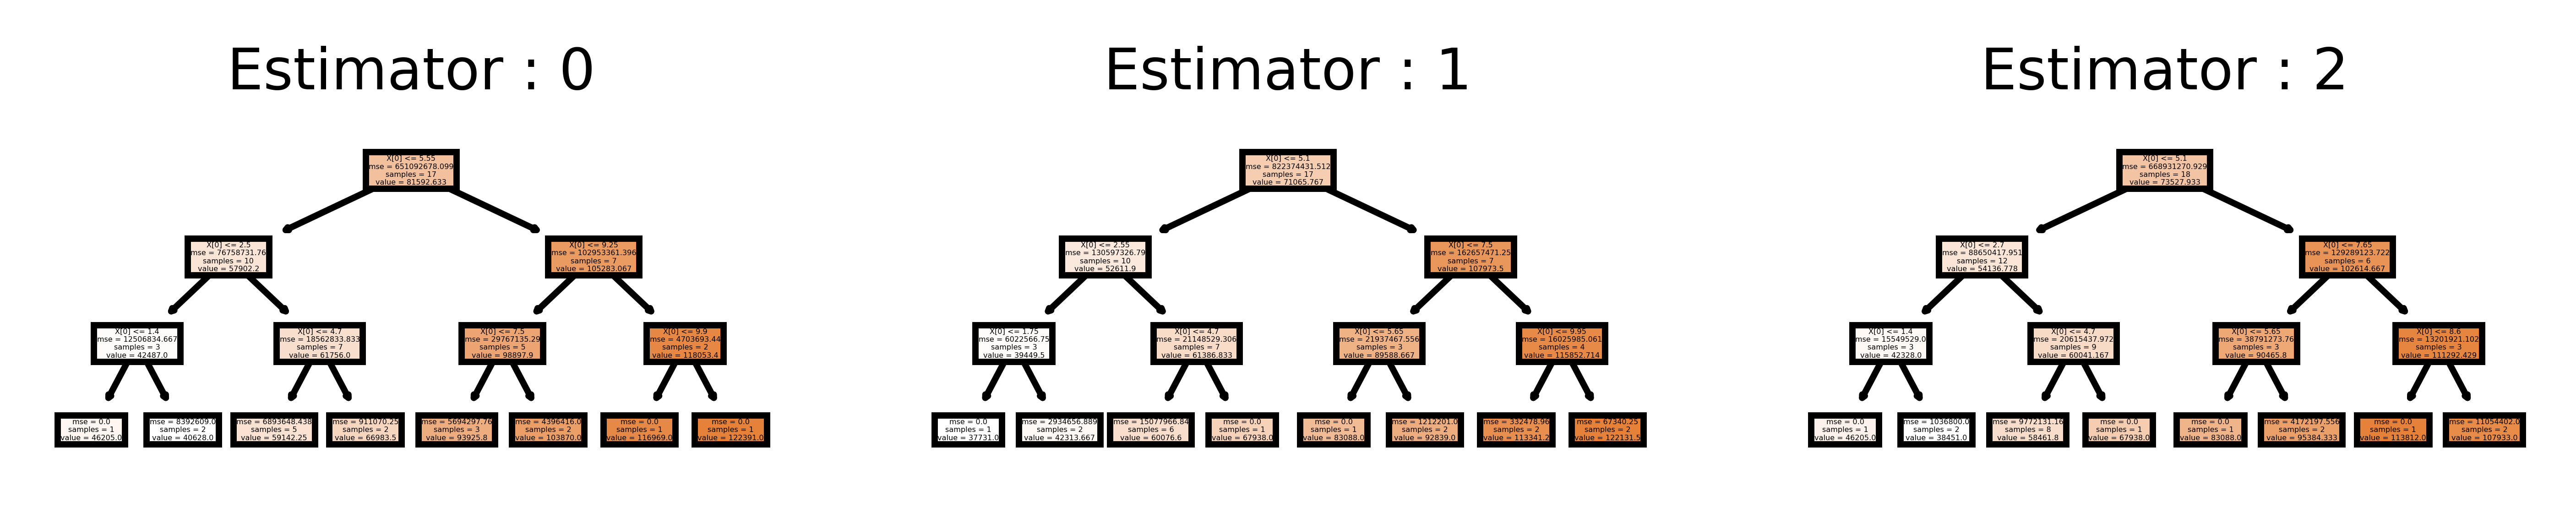

In [93]:
fig,axis = plt.subplots(nrows = 1, ncols = 3, figsize = (7,1), dpi = 1000 )
for index in range(3):
    tree.plot_tree(rreg.estimators_[index],
                  ax = axis[index],
                  filled = True)
    axis[index].set_title("Estimator : "+str(index), fontsize = 9)

In [96]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    fname : str or PathLike or file-like object
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is not set, then the output format is inferred from
        the extension of *fname*, if any, and from :rc:`savefig.format`
        otherwise.  If *format* is set, it determines the output format.
    
        Hence, if *fname* is not a path or has no extension, remember to
        spe

In [98]:
fig.savefig("randomForest.png")

## Boosting classifier 
- It is an ensemble modeling technique which attempts to build a strong classifier from the number of weak classifiers

**AdaBoost** 
- It was the first really successful boosting algorithm developed for the purpose of binary classification.
- AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”.
- Boosting in general is about building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.
- AdaBoost can be used for both classification & regression

In [ ]:
decision tree -  60% accuracy - 80% 

In [99]:
from sklearn.datasets import load_digits

In [101]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [126]:
print(digits['feature_names'])
digits.keys()

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR', 'Target'])

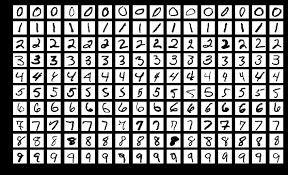

In [127]:
digit.to_csv("digits.csv")

In [128]:
digit = pd.DataFrame(digits.data, columns = digits.feature_names)
digit

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [65]:
y_test.shape

(54,)

In [105]:
digit["Target"] = digits.target
digit

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [106]:
digit.shape

(1797, 65)

In [107]:
X = digit[digit.columns[:-1]]
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [108]:
y = digit["Target"]

In [109]:
y.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: Target, dtype: int64

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
model = DecisionTreeClassifier(max_depth=5)

In [113]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [114]:
pred = model.predict(X_test)

In [116]:
accuracy_score(y_test,pred)* 100

75.18518518518519

In [117]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
admodel = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=5), n_estimators=100)

In [121]:
admodel.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [122]:
pred_val = admodel.predict(X_test)

In [124]:
accuracy_score(y_test,pred_val)* 100

96.11111111111111